In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [37]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()                 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
df.shape

(1599, 12)

In [39]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [41]:
df.isnull().value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH     sulphates  alcohol  quality
False          False             False        False           False      False                False                 False    False  False      False    False      1599
Name: count, dtype: int64

In [42]:
df.duplicated().value_counts()# Number of duplicated rows

False    1359
True      240
Name: count, dtype: int64

In [43]:
df.drop_duplicates(inplace = True)

So now there are no duplicate rows and we remove duplicate rows as, the presence of duplicate entries can introduce bias and skew the distribution of the data, leading to unreliable posterior probabilities

In [44]:
df.duplicated().value_counts()

False    1359
Name: count, dtype: int64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

Also note that we don't have any null values in our Dataset. Otherwise we could have dropped the rows containing those null Values or the feature if there are suffeciant features present in the dataset or replace the null value with mean of the column

Now let us use some Data Visualization Techniques to analyze the data 

<Axes: xlabel='fixed acidity', ylabel='quality'>

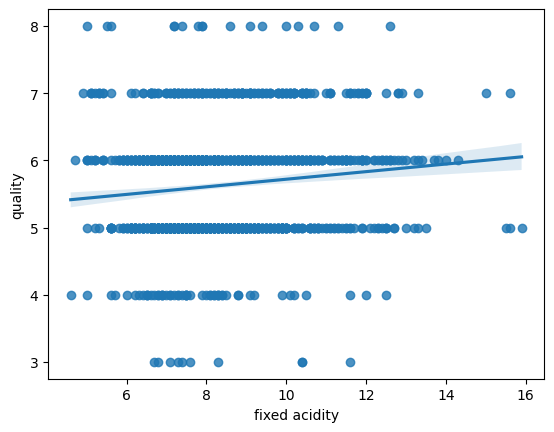

In [46]:
sns.regplot(x='fixed acidity',y='quality',data = df)

In [47]:
df.corr()['quality'].sort_values()

volatile acidity       -0.395214
density                -0.184252
total sulfur dioxide   -0.177855
chlorides              -0.130988
pH                     -0.055245
free sulfur dioxide    -0.050463
residual sugar          0.013640
fixed acidity           0.119024
citric acid             0.228057
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='citric acid', ylabel='quality'>

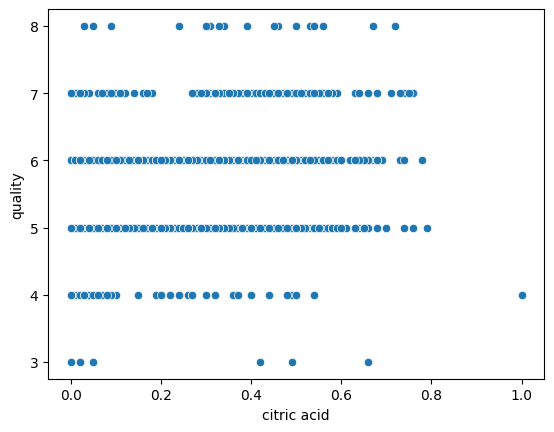

In [48]:
sns.scatterplot(x='citric acid',y = 'quality',data = df)

<Axes: xlabel='volatile acidity', ylabel='quality'>

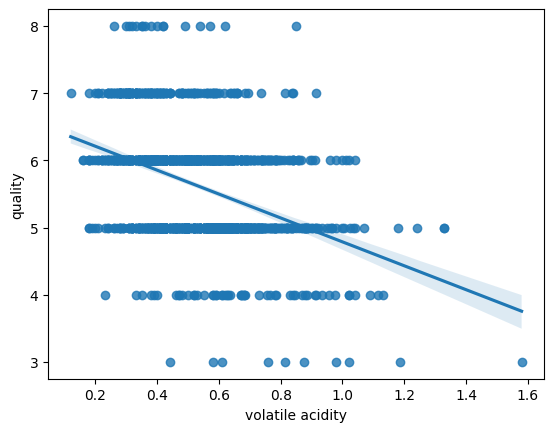

In [49]:
sns.regplot(x='volatile acidity',y = 'quality',data = df)

Here I decided to also use negative correlation as to also put some features which might also reduce the quality of wine

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [51]:
x = df[['alcohol','sulphates','citric acid','volatile acidity']]
y = df['quality']

In [52]:
# Get 70% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [53]:
x_train.shape

(1087, 4)

In [54]:
x_test.shape

(272, 4)

In [55]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [56]:
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train_norm)
x_test_poly = poly.transform(x_test_norm)
from sklearn.linear_model import LinearRegression
Lr = LinearRegression().fit(x_train_poly,y_train)

In [57]:
yhat = Lr.predict(x_test_poly)
from sklearn.metrics import mean_squared_error
import math
# Calculate the RMSE
mse = mean_squared_error(y_test, yhat)

# Print the RMSE
print("The MSE is:", rmse)

The MSE is: 0.6590948971593227


Now let us use Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=7)
parameters = {'n_estimators': [50, 100, 125, 150], 'max_depth': [2, 5, 10, 15], 'criterion' :['squared_error', 'absolute_error', 'friedman_mse'
                                                                                           , 'poisson']}
grid_search = GridSearchCV(regr, parameters, cv=10)
grid_search = grid_search.fit(x_train_norm, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("R-square value :",grid_search.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'max_depth': 5, 'n_estimators': 50}
R-square value : 0.3789542427845776


In [76]:
grid_search.score(x_test_norm,y_test)

0.27853608107916916

In [65]:
features = [feature for feature in df.columns]

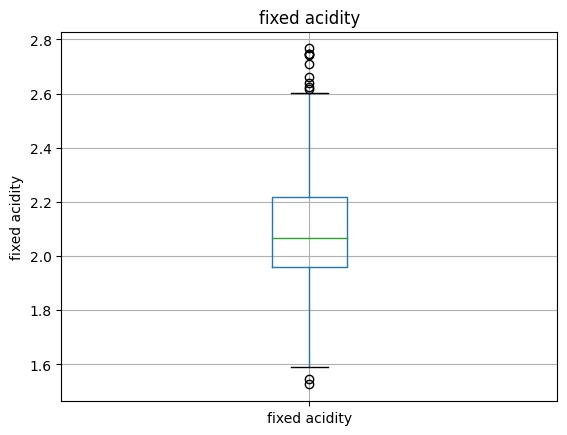

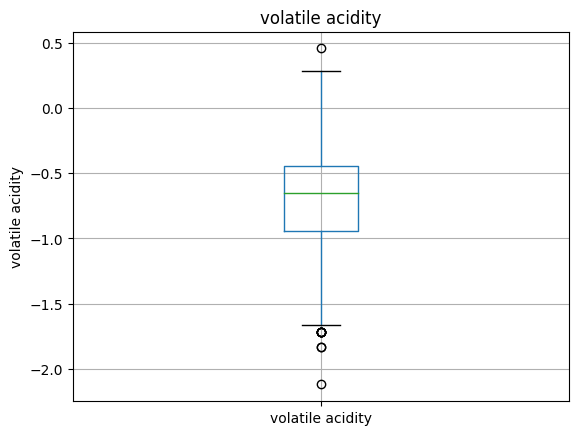

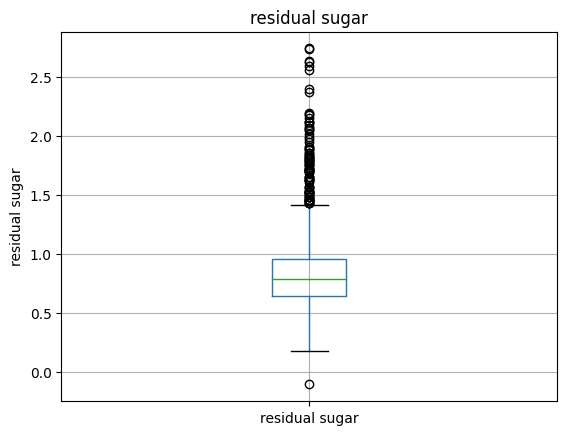

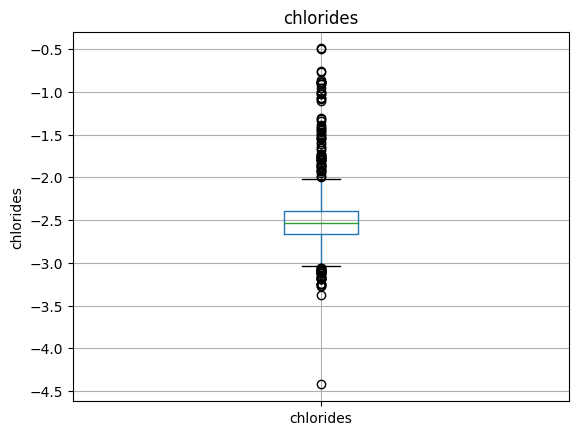

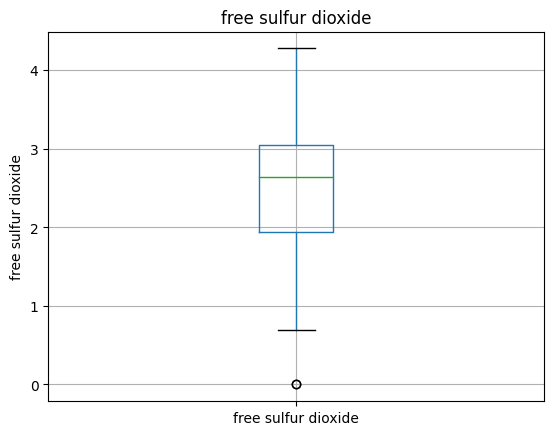

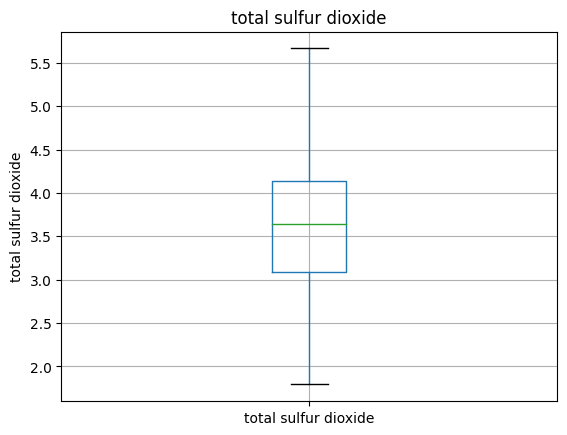

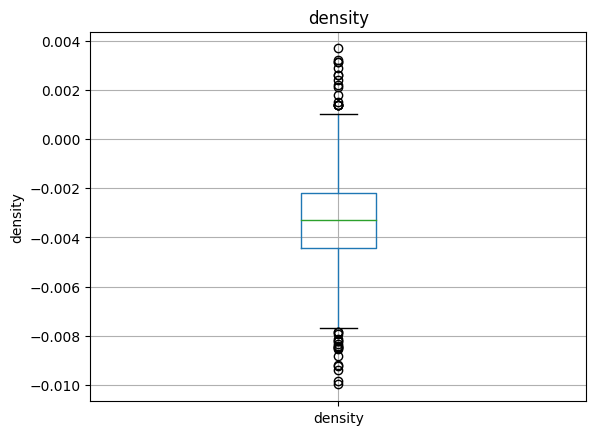

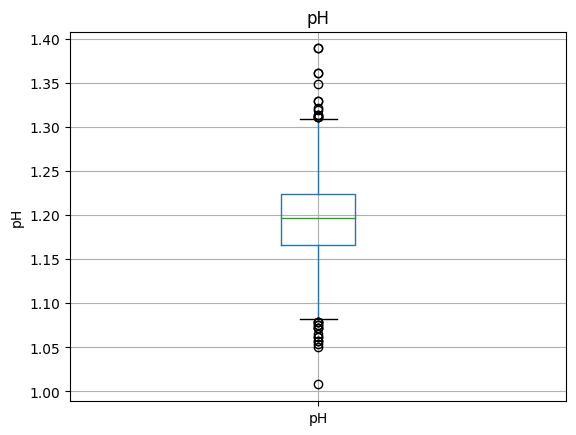

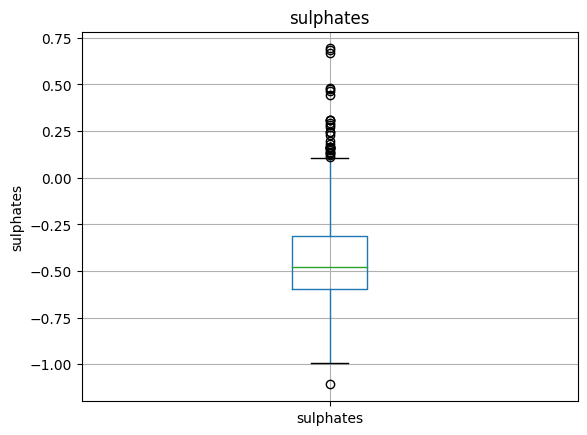

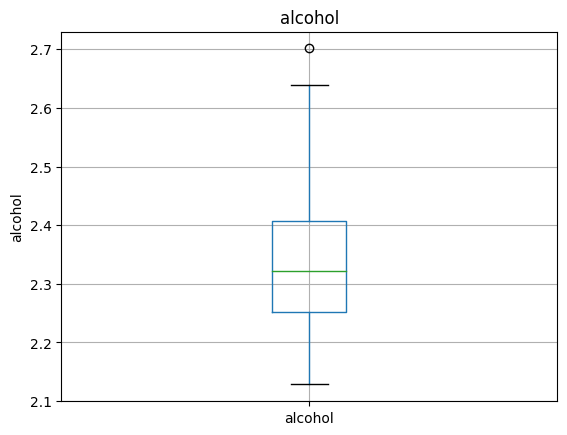

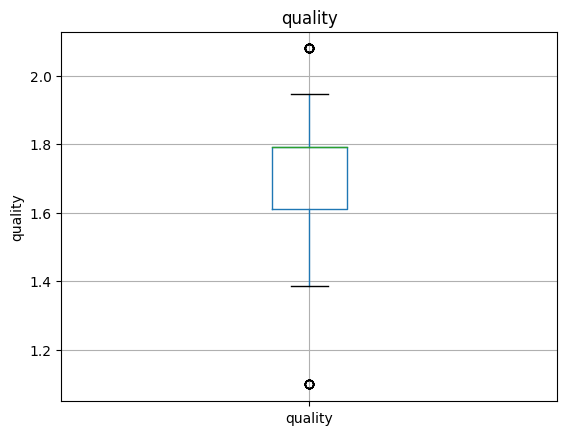

In [80]:
#Outliers detection
for feature in features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

We can clearly see that there are many outliers. Some features in particular have more than the others:
Residual Sugar, Chlorides, Sulphates
